### *_Stochastic Gradient Descent for Logistic Regression_*

Let $l(\beta)$ be the negative log likelihood associated with the logistic regression model, which was a sum over *n* terms (one term for each data point). Earlier you derived the gradient of $l(\beta)$. If you haven't already, show that this gardient can be written in the form

In [76]:
import numpy as np
from sklearn import preprocessing

def sigmoid( z ):
    """ This shrinks our beta estimate into logistic form """
    return 1 / ( 1 + np.exp( -z ) )

def cost_ll( X, y, betas ):
    """ """
    # this is the current estimate
    p = sigmoid( np.dot( betas, X.T ) )
    # this measures the difference between the guess and the actual
    return -np.sum( y*np.log( p ) + (1-y)*np.log( 1 - p ) ) 

def gradient( X, y, betas ):
    """ This calculates the gradient given X, y and our betas """
    # when stochastic gradient descent is computed over a 
    # vector of X and a vector of betas with the y response
    #  - need a part to check for a vector
    return np.dot( ( y - sigmoid( np.dot( X, betas ) ) ), X )

def logitReg( X, y, iterations=1000, alpha=0.001, verbose=0 ):
    """ This function performs 'simple' gradient descent.
        - X is the data matrix - X is scaled before performing descent
        - y are the actual values 
        - beta vector is initialized at a vector of zeros 
        - alpha or the learning rate is by default 0.01 """

    # scaling X, i.e. centered to zero and divided by std dev.
    X = preprocessing.scale( X )
    if verbose:
        print( " Scaling X column-wise, mean=0, divided by std ")

    # add column of 1s to intercept
    if sum( X[:,0] ) is not len( X[:,0] ):
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
        if verbose:
            print( " Did not detect intercept - adding an intercept ")
    
    # initialize betas vector
    betas = np.zeros( X.shape[1] )
    
    # initialize empty convergence vector and empty convergence difference vector
    cvg = []; 
    beta_hist = np.zeros([ len(betas), iterations ])
    for step in range( iterations ):
        # ammend to adjust alpha based on iteration step
        betas += alpha * gradient( X, y, betas )
        beta_hist[:,step] = betas.T
        
        # save log likelihood output for plotting
        cvg.append( cost_ll( X, y, betas ) )

    return betas, cvg, beta_hist

# def robins_monro( alpha=None, C=10, t0=1 ):
#     return C*(t+t0)**-alpha

def stochastic_logitReg(X, y, iterations=100000, cvg_step=10, alpha=0.001, verbose=0 ):
    """ """
    #check to make sure data is a numpy array
    if type( X ) is not np.ndarray or type( y ) is not np.ndarray:
        print( " X and y must be numpy arrays ")
        return 
    
    # scaling X, i.e. centered to zero and divided by std dev.
    X = preprocessing.scale( X )
    if verbose:
        print( " Scaling X column-wise, mean=0, divided by std ")

    # add column of 1s to intercept
    if sum( X[:,0] ) is not len( X[:,0] ):
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
        if verbose:
            print( " Did not detect intercept - adding an intercept ")

    # initialize betas vector
    betas = np.zeros( X.shape[1] )
    
    # run through stochastic gradient descent
    cvg = []; count=1; 
    beta_hist = np.zeros([ len( betas ), iterations ])
    for i in range( iterations ):
        # we input vectors for stochastic gradient descent
        # - it's the same basic formula just updated for each data point, not all data points
        # - this updates per data point

        # this performs descent on a random data point
        j = np.random.randint( len(X[:,1]) )

        # perform stochastic descent for each data point, not all of it!
        betas += alpha * gradient( X[j,:], y[j], betas )
        #print( betas )
        
        # collect history of betas
        beta_hist[:,i] = betas.T
        #print( beta_hist[:,count] )

        # this checks for convergence after going through 25 data points. 
        if count is cvg_step:
            cvg.append( cost_ll( X, y, betas ) )
            count=0

        count+=1

    return betas, cvg, beta_hist

def predict( X, y, betas, add_intercept=True, verbose=0 ): 
    # process data
    X = preprocessing.scale( X )
    if verbose:
        print( " Scaling X column-wise, mean=0, divided by std ")
    
    # add column of 1s to intercept
    if add_intercept:
        intercept = np.ones( (X.shape[0], 1) )
        X = np.hstack( ( intercept, X ) )
    # guess
    p = sigmoid( np.dot( X, betas ) )
    
    # see how the guess managed
    test = [ 1 if t >= 0.5 else 0 for t in p ] 
    cor = [ 1 if ( t == y ) else 0 for t, y in zip( test, y ) ] 
    acc = sum( map( int, cor ) ) / len( cor )
    if verbose:
        print( " accuracy = %d percent "%(acc*100) )
    return acc

/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/Users/anthonydutcher/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in multiply
  del sys.path[0]


Regular descent with  100000 took 54 seconds 
Stochastic descent with  100000 took 34 seconds 


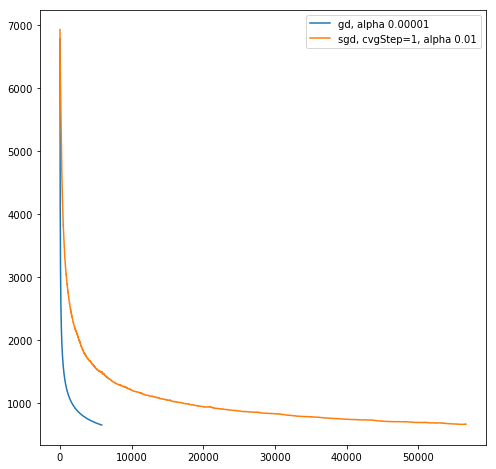

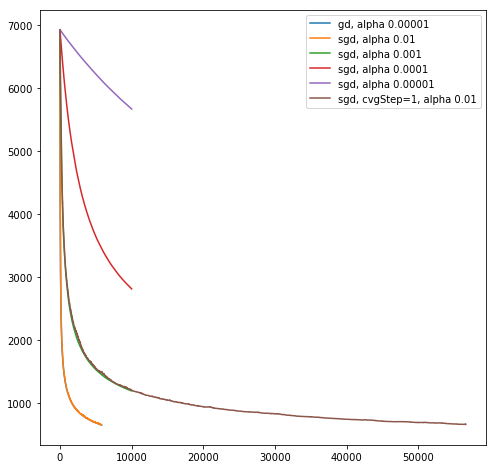

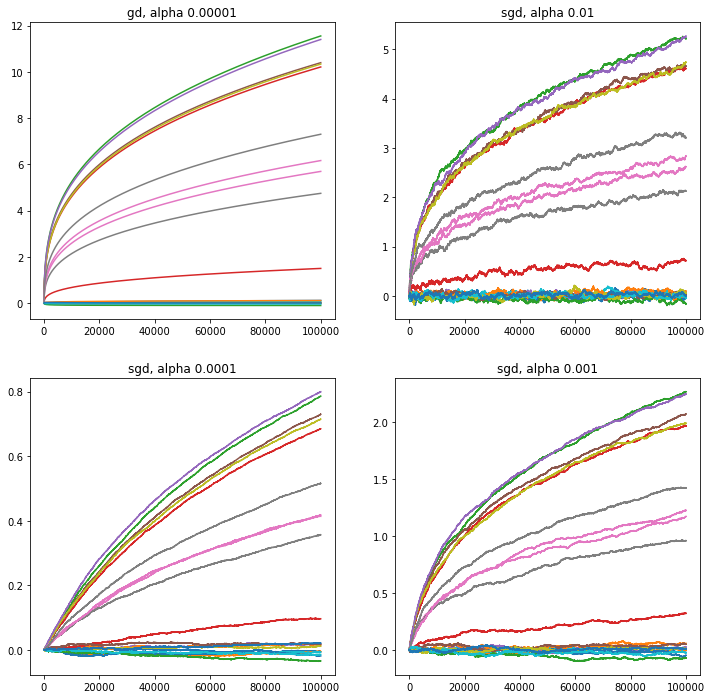

In [83]:
import numpy as np
import pandas as pd
import time

from sklearn import preprocessing
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

# make some simulated data
X,y = make_regression(n_samples=10000, n_features=20, n_informative=10, n_targets=1 )

# shape data
y = [ float(1) if x >= 0.5 else float(0) for x in y ] 
y = np.array( y )

# load data real data
data = pd.read_csv( "wdbc.txt", delimiter=",", header=None)

# shape data
XX = data.iloc[:,2:12].values 
yy = np.where( data.iloc[:,1].values == 'B', 1, 0 )

# number of iterations
iterations=100000



# -- wdbc dataset -------------------
# gradient descent - get the time
gr_start = time.time()
betas, cvg, beta_hist = logitReg( XX, yy, iterations=iterations, alpha=0.01)
gr_end=time.time()-gr_start

sh_start = time.time()
betas1, cvg1, beta_hist1 = stochastic_logitReg( XX, yy, iterations=iterations, alpha=0.01 )
sh_end=time.time()-sh_start

# -- wdbc dataset -------------------



# -- simulated dataset --------------

# gradient descent - get the time
gr_start = time.time()
betas, cvg, beta_hist = logitReg( X, y, iterations=iterations, alpha=0.00001)
gr_end=time.time()-gr_start

# stochastic gradient descent - get the time
sh_start = time.time()
betas1, cvg1, beta_hist1 = stochastic_logitReg( X, y, iterations=iterations, alpha=0.01 )
sh_end=time.time()-sh_start

# stochastic gradient descent - get the time
sh_start = time.time()
betas2, cvg2, beta_hist2 = stochastic_logitReg( X, y, iterations=iterations, alpha=0.001 )
sh_end=time.time()-sh_start

# stochastic gradient descent - get the time
sh_start = time.time()
betas3, cvg3, beta_hist3 = stochastic_logitReg( X, y, iterations=iterations, alpha=0.0001 )
sh_end=time.time()-sh_start

# stochastic gradient descent - get the time
sh_start = time.time()
betas4, cvg4, beta_hist4 = stochastic_logitReg( X, y, iterations=iterations, alpha=0.00001 )
sh_end=time.time()-sh_start

# stochastic gradient descent - get the time
sh_start = time.time()
betas5, cvg5, beta_hist5 = stochastic_logitReg( X, y, iterations=iterations, cvg_step=1, alpha=0.01 )
sh_end=time.time()-sh_start

# -- simulated dataset --------------



# print to screen
print( "Regular descent with  %d took %d seconds "%( iterations, gr_end ) )
print( "Stochastic descent with  %d took %d seconds "%( iterations, sh_end ) )

# takes an average of the last set of betas, since they can be noisy on an iteration basis
sh_betas1 = beta_hist1[:,:-50].mean(axis=1).T
sh_betas2 = beta_hist2[:,:-50].mean(axis=1).T
sh_betas3 = beta_hist3[:,:-50].mean(axis=1).T
sh_betas4 = beta_hist4[:,:-50].mean(axis=1).T

# this is the accuracy - comparable
gr_acc = predict(X, y, betas, verbose=0)
sh1_acc = predict(X, y, sh_betas1, verbose=0)
sh2_acc = predict(X, y, sh_betas2, verbose=0)
sh3_acc = predict(X, y, sh_betas3, verbose=0)
sh4_acc = predict(X, y, sh_betas4, verbose=0)

# -- PLOTTING --
# this plots comparison of gradient descent and stochastic gradient descent
plt.figure( 1, figsize=(8, 8) )
plt.plot( cvg, label="gd, alpha 0.00001" )
plt.plot( cvg5, label="sgd, cvgStep=1, alpha 0.01" )
plt.legend()

plt.figure( 2, figsize=(8, 8) )
plt.plot( cvg, label="gd, alpha 0.00001" )
plt.plot( cvg1, label="sgd, alpha 0.01" )
plt.plot( cvg2, label="sgd, alpha 0.001" )
plt.plot( cvg3, label="sgd, alpha 0.0001" )
plt.plot( cvg4, label="sgd, alpha 0.00001" )
plt.plot( cvg5, label="sgd, cvgStep=1, alpha 0.01" )
plt.legend()

# this plots the betas for stochastic gradient descent
fig, ax = plt.subplots( 2, 2, figsize=(12, 12) )
ax[0,0].plot( beta_hist.T  )
ax[0,0].set_title("gd, alpha 0.00001")
ax[0,1].plot( beta_hist1.T )
ax[0,1].set_title("sgd, alpha 0.01")
ax[1,1].plot( beta_hist2.T )
ax[1,1].set_title("sgd, alpha 0.001")
ax[1,0].plot( beta_hist3.T )
ax[1,0].set_title("sgd, alpha 0.0001")
